## Testes com Léxico de Cláudia Freitas

Uso do léxico encontrado <a href = http://www.scielo.br/pdf/rbla/v13n4/aop2813.pdf>neste artigo</a>.
Peguei o léxico de substantivos desse artigo (por enquanto) e salvei num arquivo txt. É necessário uma expressão regular para extrair as palavras do arquivo. 

As palavras encontram-se na seguinte forma: [word];

In [1]:
from utils import *
from sklearn.naive_bayes  import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import nltk

In [2]:
# Recuperação dos textos - treinar o modelo somente com as classes POS e NEG
all_data = get_data_from_db()
all_data = all_data[(all_data["labels"] == "PO") | (all_data["labels"] == "NG")]
print('Textos carregados')

# Stopwords
stopwords = nltk.corpus.stopwords.words('portuguese')

# Léxico Claudia Freitas
lexicon = load_claudia_freitas_lexicon()

# Features
features = FeatureUnion([
                    ("bigram", CountVectorizer(ngram_range=(2,2), stop_words= stopwords, binary= True)),
                    ("lexicon_vector", CountVectorizer(vocabulary= lexicon)),
                    ])


Textos carregados


### MultinomialNB

In [3]:
from utils import *
from sklearn.naive_bayes  import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import nltk

# Recuperação dos textos - treinar o modelo somente com as classes POS e NEG
all_data = get_data_from_db()
all_data = all_data[(all_data["labels"] == "PO") | (all_data["labels"] == "NG")]
print('Textos carregados')

# Stopwords
stopwords = nltk.corpus.stopwords.words('portuguese')

# Léxico
lexicon = load_claudia_freitas_lexicon()
# lexicon = get_LIWC_lexicon()

# Features
features = FeatureUnion([
                    ("bigram", CountVectorizer(ngram_range=(1,2), stop_words= stopwords, binary= True)),
                    ("lexicon_vector", CountVectorizer(vocabulary= lexicon)),
                    ])

classfier, sKFold = run_cross_validation(all_data, features, MultinomialNB(), 10, True)
export_probabilities(classifier, all_data, sKFold)


Textos carregados
Cross Validation:
Fold  0  - Acuracia:  0.774647887324
Fold  1  - Acuracia:  0.714285714286
Fold  2  - Acuracia:  0.685714285714
Fold  3  - Acuracia:  0.828571428571
Fold  4  - Acuracia:  0.757142857143
Fold  5  - Acuracia:  0.842857142857
Fold  6  - Acuracia:  0.814285714286
Fold  7  - Acuracia:  0.742857142857
Fold  8  - Acuracia:  0.728571428571
Fold  9  - Acuracia:  0.671428571429

Accuracia media:  0.756036217304
Desvio padrão:  0.0559594386387


TypeError: 'NoneType' object is not iterable

### SVM

In [4]:
run_cross_validation(all_data, 10, True, features, SVC(C=316, kernel='sigmoid', coef0= 0.5))

Cross Validation:
Fold  0  - Acuracia:  0.718309859155
Fold  1  - Acuracia:  0.714285714286
Fold  2  - Acuracia:  0.685714285714
Fold  3  - Acuracia:  0.814285714286
Fold  4  - Acuracia:  0.742857142857
Fold  5  - Acuracia:  0.714285714286
Fold  6  - Acuracia:  0.757142857143
Fold  7  - Acuracia:  0.714285714286
Fold  8  - Acuracia:  0.685714285714
Fold  9  - Acuracia:  0.657142857143

Accuracia media:  0.720402414487
Desvio padrão:  0.041464531755


Comentário da <a href = http://scikit-learn.org/stable/modules/svm.html>página do sklearn</a>:

"The disadvantages of support vector machines include:
If the number of features is much greater than the number of samples, the method is likely to give poor performances."

### Decision Tree

In [5]:
run_cross_validation(all_data, 10, True, features, DecisionTreeClassifier())

Cross Validation:
Fold  0  - Acuracia:  0.704225352113
Fold  1  - Acuracia:  0.571428571429
Fold  2  - Acuracia:  0.628571428571
Fold  3  - Acuracia:  0.7
Fold  4  - Acuracia:  0.685714285714
Fold  5  - Acuracia:  0.614285714286
Fold  6  - Acuracia:  0.728571428571
Fold  7  - Acuracia:  0.628571428571
Fold  8  - Acuracia:  0.585714285714
Fold  9  - Acuracia:  0.685714285714

Accuracia media:  0.653279678068
Desvio padrão:  0.0515337905896


### Random Forest

In [7]:
run_cross_validation(all_data, 10, True, features, RandomForestClassifier())

Cross Validation:
Fold  0  - Acuracia:  0.718309859155
Fold  1  - Acuracia:  0.7
Fold  2  - Acuracia:  0.671428571429
Fold  3  - Acuracia:  0.685714285714
Fold  4  - Acuracia:  0.628571428571
Fold  5  - Acuracia:  0.742857142857
Fold  6  - Acuracia:  0.628571428571
Fold  7  - Acuracia:  0.714285714286
Fold  8  - Acuracia:  0.671428571429
Fold  9  - Acuracia:  0.657142857143

Accuracia media:  0.681830985915
Desvio padrão:  0.0359895645447


### KNN

In [5]:
run_cross_validation(all_data, 10, True, features, KNeighborsClassifier(n_neighbors=50))

ValueError: The number of folds must be of Integral type. FeatureUnion(n_jobs=1,
       transformer_list=[('bigram', CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None,
        stop_words..., 'passividade', 'fraco', 'deprimente', 'fluidez', 'gratificante', 'simples', 'novo', 'inovador']))],
       transformer_weights=None) of type <class 'sklearn.pipeline.FeatureUnion'> was passed.

In [6]:
from sklearn.linear_model import LogisticRegression
run_cross_validation(all_data, features, LogisticRegression(), 10, True)

Cross Validation:
Fold  0  - Acuracia:  0.760563380282
Fold  1  - Acuracia:  0.671428571429
Fold  2  - Acuracia:  0.685714285714
Fold  3  - Acuracia:  0.785714285714
Fold  4  - Acuracia:  0.742857142857
Fold  5  - Acuracia:  0.742857142857
Fold  6  - Acuracia:  0.742857142857
Fold  7  - Acuracia:  0.742857142857
Fold  8  - Acuracia:  0.642857142857
Fold  9  - Acuracia:  0.657142857143

Accuracia media:  0.717484909457
Desvio padrão:  0.046289338918


In [19]:
from sklearn.feature_selection import mutual_info_classif

cv = CountVectorizer(ngram_range=(2,2), stop_words=stopwords)
feature_matrix = cv.fit_transform(all_data["texts"])

labels = []
for label in all_data["labels"]:
    if label == 'PO':
        labels.append(1)
    elif label == "NG":
        labels.append(-1)
    elif label == "NE":
        pass
#         labels.append(0)
        
labels = np.array(labels)

mi = mutual_info_classif(feature_matrix.toarray(), labels)

<IPython.core.display.Javascript object>


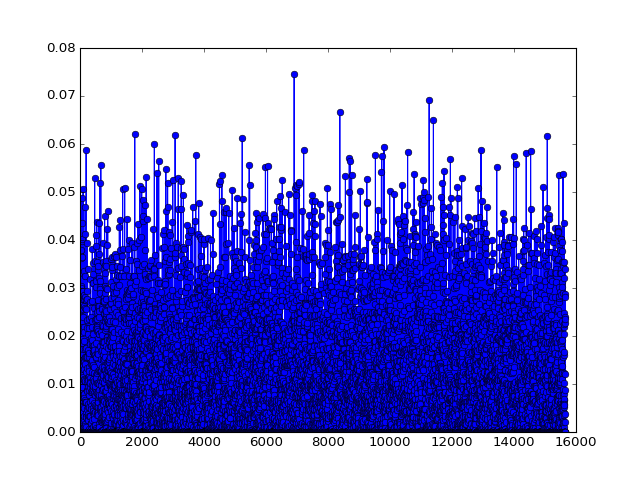

In [20]:
%matplotlib notebook
from matplotlib import pyplot as plt

plt.figure()
plt.plot(mi,'-o')

In [25]:
v = cv.vocabulary_
w = [word for word in v.keys() if v[word] == 8316]
w

['longa mesa']